# [RBAC 2024] ROUND 2: CASE STUDY 
Our task involves conducting a thorough analysis of the relationships between different customer segments 
and the loan products they utilize, as well as identifying the key differences and trends that emerged in 
the years 2022 and 2023. These insights will be essential for understanding customer behavior, market 
conditions, and their impact on the business during this period.

**As a Business Analyst at SHBFinance, you are required to achieve 5 objectives:**
1. Define customers profile of SHBFinance
2. Define the characteristics of loans borrowed
3. Explore the correlation between customer profile and loans borrowed
4. Compare the year-over-year performance of lending activities
5. Give strategic recommendations to improve loan origination and sales

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
loan_origin = pd.read_csv('dataset/loan_origin.csv')
demographic = pd.read_csv('dataset/demographic.csv')
print(demographic.columns)
print(loan_origin.columns)

Index(['LABOUR_CONTRACT_TYPE', 'NUMBER_OF_DEPENDANTS',
       'PERMANENT_ADDRESS_PROVINCE', 'INDUSTRY', 'JOB',
       'COMPANY_ADDRESS_PROVINCE', 'CONTRACT_NO', 'WEIGHT', 'EDUCATION',
       'CUSTOMER_INCOME', 'CREDITIBILITY', 'ACCOMMODATION_TYPE',
       'DATE_OF_BIRTH', 'HEIGHT', 'WORKING_IN_YEAR', 'MARITAL_STATUS',
       'INCOME_RESOURCE'],
      dtype='object')
Index(['DISBURSEMENT_CHANNEL', 'LIQUIDITY', 'INSURANCE_COMPANY',
       'INSURANCE_RATE', 'DISBURSEMENT_DATE', 'CONTRACT_NO', 'RATE',
       'HAS_INSURANCE', 'PRODUCT_CATEGORY', 'LOAN_TERM', 'MONTH_INTEREST',
       'LOAN_PURPOSE', 'BUSINESS_LINE', 'LOAN_AMOUNT'],
      dtype='object')


In [46]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371200 entries, 0 to 371199
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   LABOUR_CONTRACT_TYPE        293048 non-null  float64
 1   NUMBER_OF_DEPENDANTS        307877 non-null  float64
 2   PERMANENT_ADDRESS_PROVINCE  315371 non-null  float64
 3   INDUSTRY                    304094 non-null  float64
 4   JOB                         315548 non-null  float64
 5   COMPANY_ADDRESS_PROVINCE    262358 non-null  float64
 6   CONTRACT_NO                 315507 non-null  float64
 7   WEIGHT                      315684 non-null  float64
 8   EDUCATION                   308236 non-null  float64
 9   CUSTOMER_INCOME             315351 non-null  float64
 10  CREDITIBILITY               315533 non-null  float64
 11  ACCOMMODATION_TYPE          307761 non-null  float64
 12  DATE_OF_BIRTH               315328 non-null  float64
 13  HEIGHT        

In [47]:
loan_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371200 entries, 0 to 371199
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   DISBURSEMENT_CHANNEL  315211 non-null  float64
 1   LIQUIDITY             315574 non-null  float64
 2   INSURANCE_COMPANY     315396 non-null  float64
 3   INSURANCE_RATE        315613 non-null  float64
 4   DISBURSEMENT_DATE     315470 non-null  object 
 5   CONTRACT_NO           315643 non-null  float64
 6   RATE                  315635 non-null  float64
 7   HAS_INSURANCE         315334 non-null  object 
 8   PRODUCT_CATEGORY      315447 non-null  float64
 9   LOAN_TERM             315169 non-null  float64
 10  MONTH_INTEREST        315292 non-null  float64
 11  LOAN_PURPOSE          315973 non-null  float64
 12  BUSINESS_LINE         315584 non-null  float64
 13  LOAN_AMOUNT           315681 non-null  float64
dtypes: float64(12), object(2)
memory usage: 39.6+ MB


In [48]:
demographic

,LABOUR_CONTRACT_TYPE,NUMBER_OF_DEPENDANTS,PERMANENT_ADDRESS_PROVINCE,INDUSTRY,JOB,COMPANY_ADDRESS_PROVINCE,CONTRACT_NO,WEIGHT,EDUCATION,CUSTOMER_INCOME,CREDITIBILITY,ACCOMMODATION_TYPE,DATE_OF_BIRTH,HEIGHT,WORKING_IN_YEAR,MARITAL_STATUS,INCOME_RESOURCE
0,2.0,2.0,20.0,18.0,9.0,74.0,NaN,60.0,1.0,6056000.0,1.0,0.0,1979.0,155.0,1.0,2.0,5.0
1,4.0,0.0,58.0,18.0,NaN,58.0,569518.0,NaN,2.0,19092000.0,0.0,0.0,1969.0,178.0,2.0,1.0,1.0
2,4.0,0.0,NaN,2.0,NaN,74.0,569723.0,65.0,1.0,1936000.0,2.0,3.0,1964.0,189.0,16.0,4.0,5.0
3,4.0,1.0,46.0,18.0,4.0,NaN,NaN,83.0,2.0,15413000.0,0.0,0.0,NaN,168.0,3.0,2.0,5.0
4,4.0,3.0,NaN,18.0,9.0,NaN,571556.0,74.0,1.0,17533000.0,2.0,NaN,1974.0,172.0,8.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371195,4.0,3.0,75.0,18.0,NaN,75.0,630947.0,82.0,6.0,19262000.0,3.0,0.0,1976.0,156.0,2.0,2.0,NaN
371196,4.0,0.0,94.0,NaN,1.0,NaN,823371.0,99.0,NaN,17533000.0,NaN,4.0,NaN,175.0,NaN,0.0,5.0
371197,NaN,NaN,75.0,18.0,NaN,75.0,631768.0,63.0,3.0,12520000.0,0.0,0.0,1994.0,141.0,3.0,2.0,5.0
371198,4.0,0.0,45.0,18.0,NaN,NaN,NaN,97.0,NaN,17533000.0,3.0,0.0,1981.0,189.0,NaN,2.0,1.0


In [49]:
loan_origin

,DISBURSEMENT_CHANNEL,LIQUIDITY,INSURANCE_COMPANY,INSURANCE_RATE,DISBURSEMENT_DATE,CONTRACT_NO,RATE,HAS_INSURANCE,PRODUCT_CATEGORY,LOAN_TERM,MONTH_INTEREST,LOAN_PURPOSE,BUSINESS_LINE,LOAN_AMOUNT
0,1.0,3.0,0.0,3.75,2023-09,571094.0,3.0,NaN,0.0,36.0,2.0,1.0,NaN,3450000.0
1,2.0,3.0,NaN,3.75,2023-09,569518.0,4.0,YES,1.0,NaN,2.6,3.0,0.0,3060000.0
2,1.0,1.0,0.0,3.75,2023-09,569723.0,NaN,NaN,0.0,NaN,1.7,3.0,0.0,1520000.0
3,1.0,4.0,1.0,3.75,2023-09,569501.0,0.0,YES,1.0,15.0,2.0,3.0,0.0,NaN
4,1.0,4.0,1.0,3.75,2023-09,NaN,2.0,NaN,0.0,NaN,1.7,3.0,0.0,3060000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371195,1.0,1.0,1.0,3.75,2023-12,630947.0,5.0,YES,2.0,36.0,1.7,3.0,2.0,NaN
371196,1.0,4.0,0.0,3.75,2023-12,823371.0,3.0,YES,1.0,36.0,NaN,6.0,0.0,3060000.0
371197,1.0,NaN,0.0,3.75,2023-12,NaN,0.0,NaN,2.0,18.0,2.3,6.0,NaN,1520000.0
371198,1.0,0.0,1.0,NaN,2023-12,630638.0,NaN,YES,1.0,24.0,2.0,3.0,NaN,1520000.0


## DATA PREPARATION

In [36]:
demographic.drop(columns=['PERMANENT_ADDRESS_PROVINCE', 'COMPANY_ADDRESS_PROVINCE', 'WEIGHT', 'HEIGHT'])
demographic.dropna(subset=['CONTRACT_NO'], inplace=True)
loan_origin.dropna(subset=['CONTRACT_NO', 'DISBURSEMENT_DATE'], inplace=True)
merged_df = pd.merge(demographic, loan_origin, on='CONTRACT_NO', how='inner')
merged_df.dropna(inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1879 entries, 56 to 227845
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LABOUR_CONTRACT_TYPE        1879 non-null   float64
 1   NUMBER_OF_DEPENDANTS        1879 non-null   float64
 2   PERMANENT_ADDRESS_PROVINCE  1879 non-null   float64
 3   INDUSTRY                    1879 non-null   float64
 4   JOB                         1879 non-null   float64
 5   COMPANY_ADDRESS_PROVINCE    1879 non-null   float64
 6   CONTRACT_NO                 1879 non-null   float64
 7   WEIGHT                      1879 non-null   float64
 8   EDUCATION                   1879 non-null   float64
 9   CUSTOMER_INCOME             1879 non-null   float64
 10  CREDITIBILITY               1879 non-null   float64
 11  ACCOMMODATION_TYPE          1879 non-null   float64
 12  DATE_OF_BIRTH               1879 non-null   float64
 13  HEIGHT                      1879 no

In [37]:
forein_key = ['CONTRACT_NO']
numeric_columns_loan = ['MONTH_INTEREST', 'INSURANCE_RATE', 'LOAN_AMOUNT']
exclude_column = ['DISBURSEMENT_DATE', 'INSURANCE_COMPANY']
category_columns_loan = loan_origin.columns.difference(numeric_columns_loan + forein_key + exclude_column).tolist()

for column in numeric_columns_loan:
    loan_origin[column] = loan_origin[column].fillna(
        loan_origin[column].mean())
    
for column in category_columns_loan:
    loan_origin[column] = loan_origin[column].fillna(
        loan_origin[column].mode()[0])

loan_origin['HAS_INSURANCE'] = loan_origin['HAS_INSURANCE'].apply(lambda x: 1 if x == 'YES' else 0)

loan_origin['DISBURSEMENT_YEAR'] = loan_origin['DISBURSEMENT_DATE'].apply(lambda x: str(x).split('-')[0] if '-' in str(x) else x)
loan_origin['DISBURSEMENT_MONTH'] = loan_origin['DISBURSEMENT_DATE'].apply(lambda x: str(x).split('-')[1] if '-' in str(x) else x)

loan_origin.drop(columns=['DISBURSEMENT_DATE', 'INSURANCE_COMPANY'], inplace=True)
loan_origin.dropna(subset=['CONTRACT_NO', 'DISBURSEMENT_YEAR'], inplace=True)

category_columns_loan += ['DISBURSEMENT_YEAR', 'DISBURSEMENT_MONTH']
loan_origin[forein_key + category_columns_loan] = loan_origin[forein_key + category_columns_loan].astype('Int64')

loan_origin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268129 entries, 0 to 371199
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   DISBURSEMENT_CHANNEL  268129 non-null  Int64  
 1   LIQUIDITY             268129 non-null  Int64  
 2   INSURANCE_RATE        268129 non-null  float64
 3   CONTRACT_NO           268129 non-null  Int64  
 4   RATE                  268129 non-null  Int64  
 5   HAS_INSURANCE         268129 non-null  Int64  
 6   PRODUCT_CATEGORY      268129 non-null  Int64  
 7   LOAN_TERM             268129 non-null  Int64  
 8   MONTH_INTEREST        268129 non-null  float64
 9   LOAN_PURPOSE          268129 non-null  Int64  
 10  BUSINESS_LINE         268129 non-null  Int64  
 11  LOAN_AMOUNT           268129 non-null  float64
 12  DISBURSEMENT_YEAR     268129 non-null  Int64  
 13  DISBURSEMENT_MONTH    268129 non-null  Int64  
dtypes: Int64(11), float64(3)
memory usage: 33.5 MB


In [38]:
merged_df = pd.merge(demographic, loan_origin, on='CONTRACT_NO', how='inner')
# Scale the income and loan amount to millions (unit: 1,000,000 VND)
# merged_df['CUSTOMER_INCOME'] = merged_df['CUSTOMER_INCOME'] / 1e6
# merged_df['LOAN_AMOUNT'] = merged_df['LOAN_AMOUNT'] / 1e6
merged_df

,LABOUR_CONTRACT_TYPE,NUMBER_OF_DEPENDANTS,PERMANENT_ADDRESS_PROVINCE,INDUSTRY,JOB,COMPANY_ADDRESS_PROVINCE,CONTRACT_NO,WEIGHT,EDUCATION,CUSTOMER_INCOME,...,RATE,HAS_INSURANCE,PRODUCT_CATEGORY,LOAN_TERM,MONTH_INTEREST,LOAN_PURPOSE,BUSINESS_LINE,LOAN_AMOUNT,DISBURSEMENT_YEAR,DISBURSEMENT_MONTH
0,4.0,0.0,58.0,18.0,NaN,58.0,569518.0,NaN,2.0,19092000.0,...,4,1,1,24,2.600000,3,0,3.060000e+06,2023,9
1,4.0,0.0,NaN,2.0,NaN,74.0,569723.0,65.0,1.0,1936000.0,...,3,1,0,24,1.700000,3,0,1.520000e+06,2023,9
2,2.0,1.0,96.0,NaN,0.0,75.0,569818.0,85.0,1.0,17533000.0,...,3,1,2,24,2.000000,6,0,2.910000e+06,2023,9
3,2.0,0.0,48.0,18.0,1.0,48.0,569794.0,NaN,1.0,17018000.0,...,4,1,1,24,1.700000,3,0,2.250000e+06,2023,9
4,NaN,2.0,89.0,18.0,9.0,NaN,810070.0,69.0,1.0,7025000.0,...,5,1,1,12,2.000000,3,0,2.538983e+06,2023,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227935,1.0,0.0,84.0,NaN,4.0,79.0,630542.0,66.0,1.0,15413000.0,...,5,1,1,24,2.900000,6,2,3.060000e+06,2023,12
227936,NaN,0.0,91.0,NaN,9.0,NaN,823387.0,54.0,3.0,18808000.0,...,0,1,6,24,1.300000,3,0,1.360000e+06,2023,12
227937,4.0,3.0,75.0,18.0,NaN,75.0,630947.0,82.0,6.0,19262000.0,...,5,1,2,36,1.700000,3,2,2.538983e+06,2023,12
227938,4.0,0.0,94.0,NaN,1.0,NaN,823371.0,99.0,NaN,17533000.0,...,3,1,1,36,2.011661,6,0,3.060000e+06,2023,12


In [39]:
merged_2022 = merged_df[merged_df['DISBURSEMENT_YEAR'] == 2022]
merged_2022.Name = '2022'
merged_2023 = merged_df[merged_df['DISBURSEMENT_YEAR'] == 2023]
merged_2023.Name = '2023'

merged_2022

,LABOUR_CONTRACT_TYPE,NUMBER_OF_DEPENDANTS,PERMANENT_ADDRESS_PROVINCE,INDUSTRY,JOB,COMPANY_ADDRESS_PROVINCE,CONTRACT_NO,WEIGHT,EDUCATION,CUSTOMER_INCOME,...,RATE,HAS_INSURANCE,PRODUCT_CATEGORY,LOAN_TERM,MONTH_INTEREST,LOAN_PURPOSE,BUSINESS_LINE,LOAN_AMOUNT,DISBURSEMENT_YEAR,DISBURSEMENT_MONTH
29,4.0,1.0,35.0,18.0,NaN,NaN,765326.0,87.0,NaN,12264000.0,...,2,1,6,24,1.800000,3,0,7.500000e+05,2022,6
53,4.0,0.0,38.0,NaN,9.0,NaN,765320.0,81.0,3.0,9747000.0,...,3,1,0,24,2.500000,3,0,2.538983e+06,2022,6
65,4.0,2.0,40.0,18.0,1.0,40.0,382496.0,63.0,1.0,18522000.0,...,3,1,2,36,1.500000,3,0,4.430000e+06,2022,6
66,4.0,0.0,66.0,2.0,9.0,74.0,383175.0,61.0,NaN,15413000.0,...,2,1,0,36,2.500000,6,0,3.000000e+06,2022,6
67,2.0,0.0,20.0,18.0,9.0,27.0,382823.0,63.0,1.0,NaN,...,3,1,0,36,2.500000,6,0,3.540000e+06,2022,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209561,NaN,0.0,33.0,18.0,2.0,33.0,436129.0,72.0,NaN,NaN,...,1,1,2,24,2.011661,3,0,2.210000e+06,2022,10
209562,NaN,NaN,6.0,18.0,4.0,NaN,436354.0,NaN,1.0,17533000.0,...,5,1,1,36,2.200000,3,0,3.000000e+06,2022,10
209563,4.0,0.0,48.0,18.0,9.0,56.0,438722.0,94.0,NaN,18808000.0,...,3,1,5,30,0.800000,6,0,4.010000e+06,2022,10
209564,4.0,0.0,51.0,18.0,NaN,NaN,779206.0,79.0,1.0,15413000.0,...,3,1,9,12,2.100000,3,0,2.800000e+05,2022,10


In [40]:
colors = ['#FF0000', '#FF8700', '#FFD300', '#A1FF0A',
          '#0AFF99', '#0AEFFF', '#147DF5', '#BE0AFF']


def hist_plot(df, attr, colors, bin_size=1):
    min_value = df[attr].min()
    max_value = df[attr].max()
    bins = np.arange(min_value, max_value + bin_size * 2, bin_size)

    plt.figure(figsize=(22, 6))

    counts, bins, patches = plt.hist(df[attr], bins=bins, edgecolor='black')
    plt.xticks(bins, rotation=60)

    for count, patch in zip(counts, patches):
        plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
                 ha='center', va='bottom')

    for i, patch in enumerate(patches):
        patch.set_facecolor(colors[i % len(colors)])

    plt.xlabel(attr)
    plt.ylabel('Count')
    if hasattr(df, 'Name'):
        plt.title(f'Histogram Plot for {attr} of {df.Name}')
    else:
        plt.title(f'Histogram Plot for {attr}')


def hist_plot_1(df, attr, colors, bin_size=1):
    max_value = df[attr].max()
    # Tạo bins với khoảng cách 1 triệu
    bins = np.arange(0, max_value + bin_size, bin_size)

    plt.figure(figsize=(22, 6))
    counts, bins, patches = plt.hist(df[attr], bins=bins, edgecolor='black')

    labels = [f'{int(x)}M' for x in bins]
    plt.xticks(bins, labels, rotation=60)

    for count, patch in zip(counts, patches):
        plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
                 ha='center', va='bottom')

    for i, patch in enumerate(patches):
        patch.set_facecolor(colors[i % len(colors)])

    plt.xlabel(attr)
    plt.ylabel('Count')

    if hasattr(df, 'Name'):
        plt.title(f'Histogram Plot for {attr} of {df.Name}')
    else:
        plt.title(f'Histogram Plot for {attr}')

def pie_plot(df, attr, colors):
    counts = df[attr].value_counts()
    labels = counts.index.tolist()
    values = counts.values.tolist()

    colors = [colors[i % len(colors)] for i in range(len(labels))]

    plt.figure(figsize=(8, 8))
    wedges, texts = plt.pie(values, startangle=90, colors=colors, wedgeprops={
                            'edgecolor': 'black'}, labels=['']*len(values))

    legend_labels = [f'{label}: {value} ({percentage:.1f}%)' for label, value, percentage in zip(
        labels, values, [100 * v / sum(values) for v in values])]

    plt.legend(wedges, legend_labels, title=attr,
               loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    if hasattr(df, 'Name'):
        plt.title(f'Pie Chart for {attr} of {df.Name}')
    else:
        plt.title(f'Pie Chart for {attr}')


def pie_plot_1(df, attr, colors):
    counts = df[attr].value_counts()
    labels_tmp = counts.index.tolist()
    values_tmp = counts.values.tolist()
    # print(counts)

    labels = labels_tmp[:3]
    values = values_tmp[:3]
    labels.append('Greater than 2')
    values.append(sum(values_tmp[3:]))

    colors = [colors[i % len(colors)] for i in range(len(labels))]

    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(
        values, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

    plt.legend(wedges, labels, title=attr, loc="center left",
               bbox_to_anchor=(1, 0, 0.5, 1))

    if hasattr(df, 'Name'):
        plt.title(f'Pie Chart for {attr} of {df.Name}')
    else:
        plt.title(f'Pie Chart for {attr}')

def box_plot(df, attr, colors):
    plt.figure(figsize=(22, 6))
    box = df.boxplot(column=attr, grid=False, vert=False, patch_artist=True, color=dict(boxes='blue', whiskers='black', medians='black', caps='black'))

    # Get the data for the specified attribute
    data = df[attr].dropna()  # Drop any NaN values

    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    # Plot outliers with their values
    for outlier in outliers:
        plt.text(outlier, 1, f'{outlier}', ha='center', va='top', color='red', rotation=60)

    plt.xlabel(attr)
    if hasattr(df, 'Name') and df.Name:
        plt.title(f'Box Plot for {attr} of {df.Name}')
    else:
        plt.title(f'Box Plot for {attr}')

# def bar_plot(df, attr, colors):
#     counts = df[attr].value_counts()
#     labels = counts.index.tolist()
#     values = counts.values.tolist()

#     plt.figure(figsize=(22, 6))

#     bars = plt.bar(labels, values, edgecolor='black', color=[colors[i % len(colors)] for i in range(len(labels))])

#     plt.xticks(rotation=60)
#     plt.xlabel(attr)
#     plt.ylabel('Count')
#     if df.Name:
#         plt.title(f'Bar Plot for {attr} of {df.Name}')
#     else:
#         plt.title(f'Bar Plot for {attr}')

#     for bar, count in zip(bars, values):
#         plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(count),
#                  ha='center', va='bottom')

## QUESTION 1: 
SHBFinance wants to learn more about their customers. Could you provide a detailed
description of the demographics of customers who borrowed loans in 2022 and 2023?.

### YEAR_OF_BIRTH

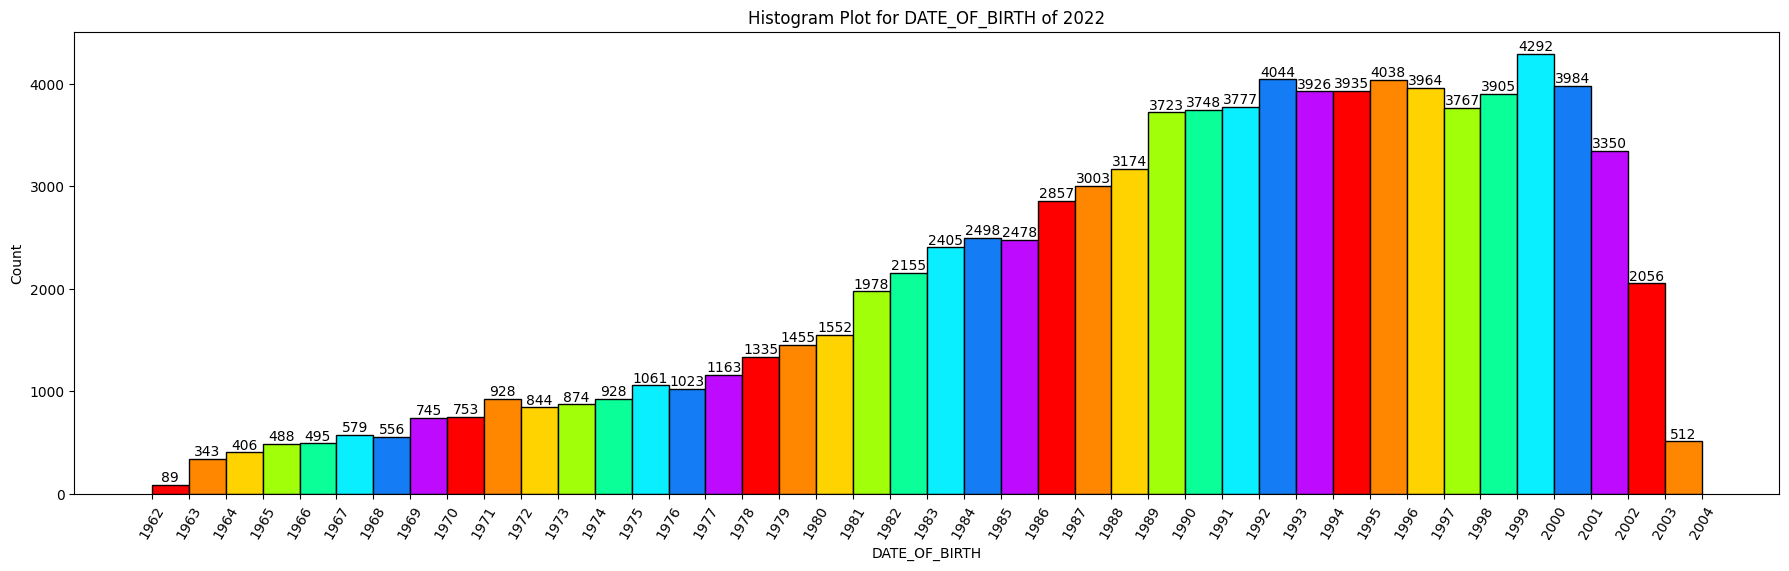

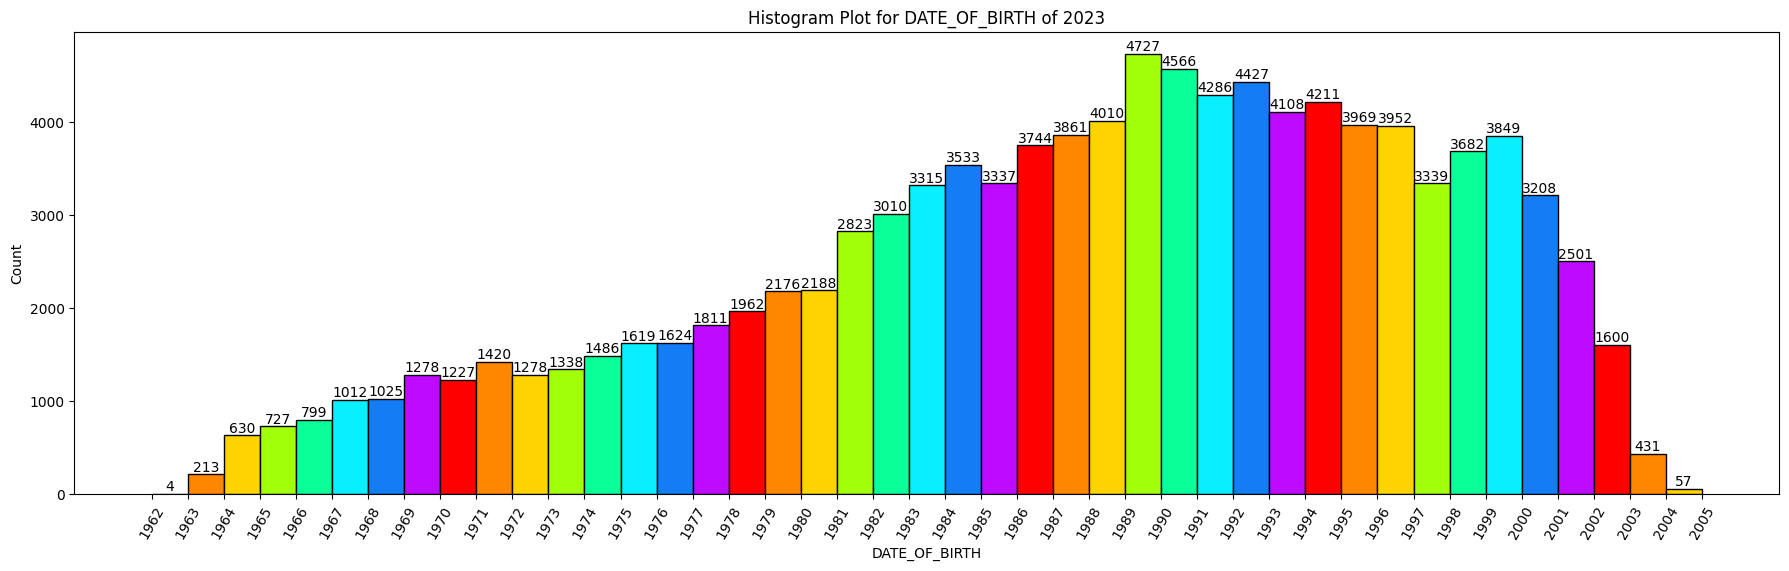

In [41]:
hist_plot(merged_2022, 'DATE_OF_BIRTH', colors) 
hist_plot(merged_2023, 'DATE_OF_BIRTH', colors) 

### NUMBER_OF_DEPENDANTS

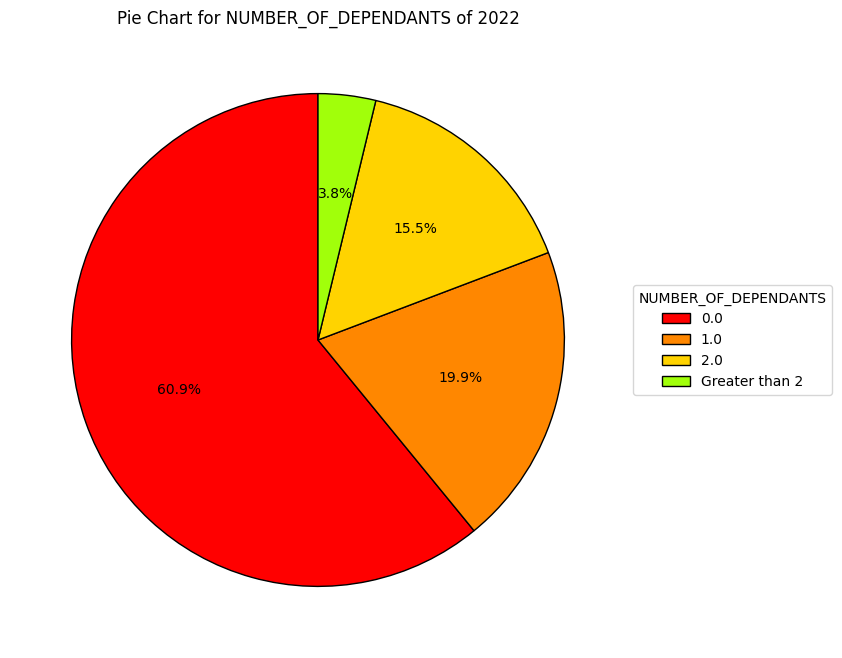

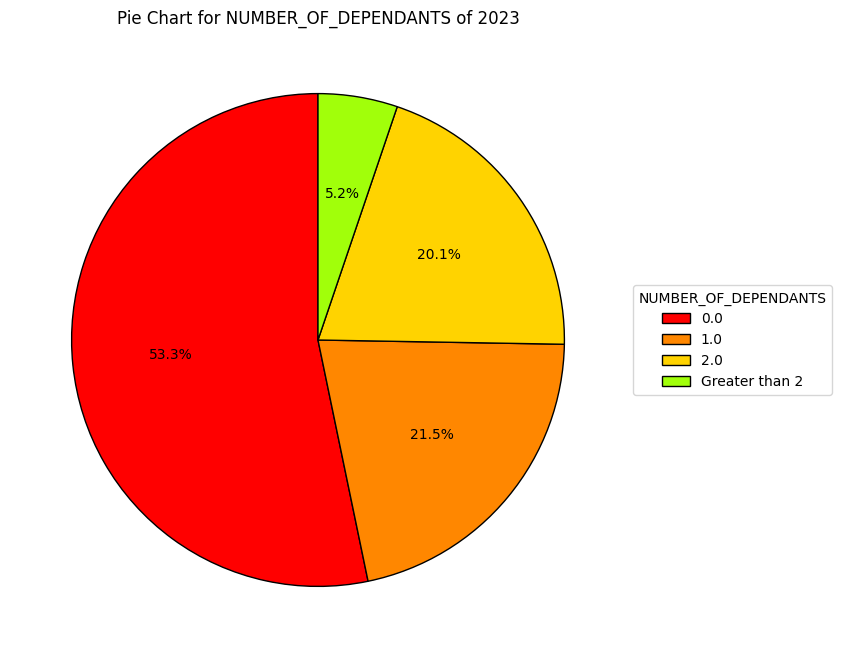

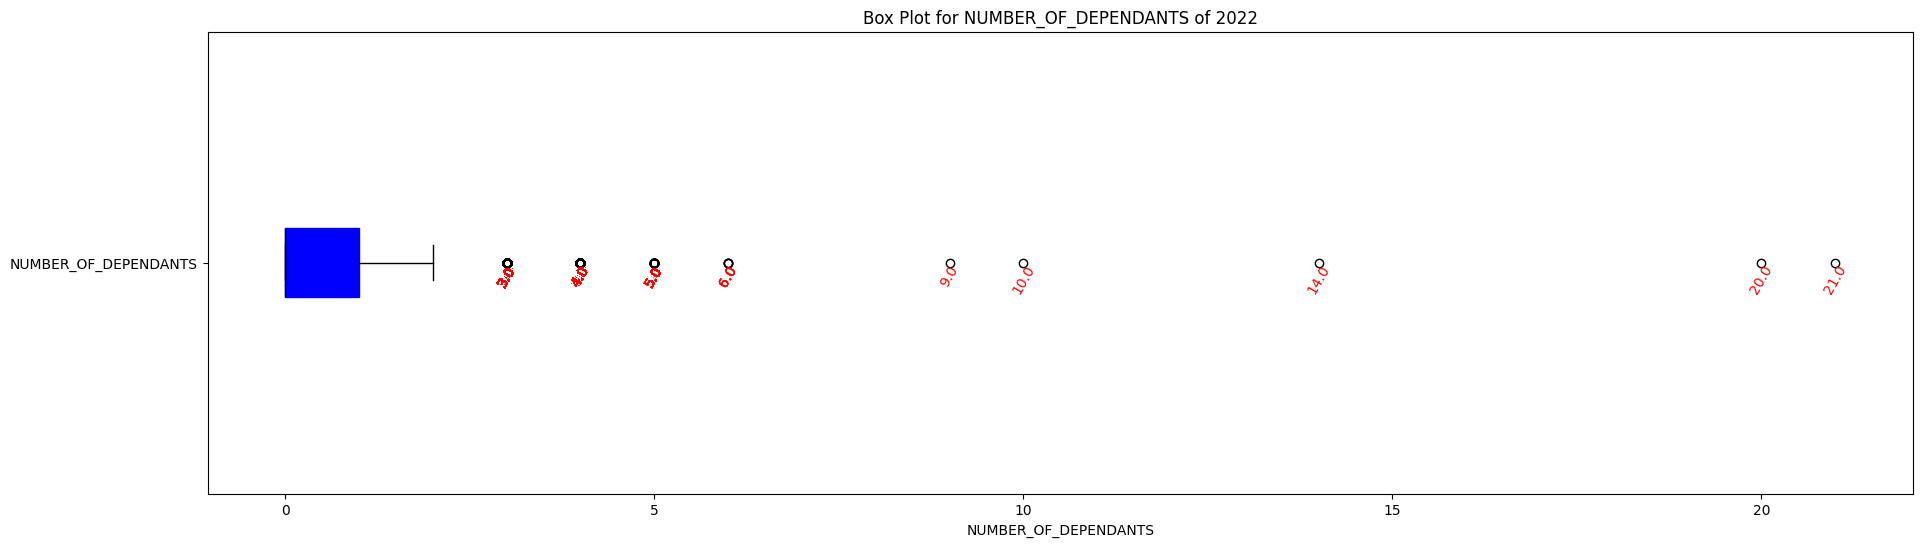

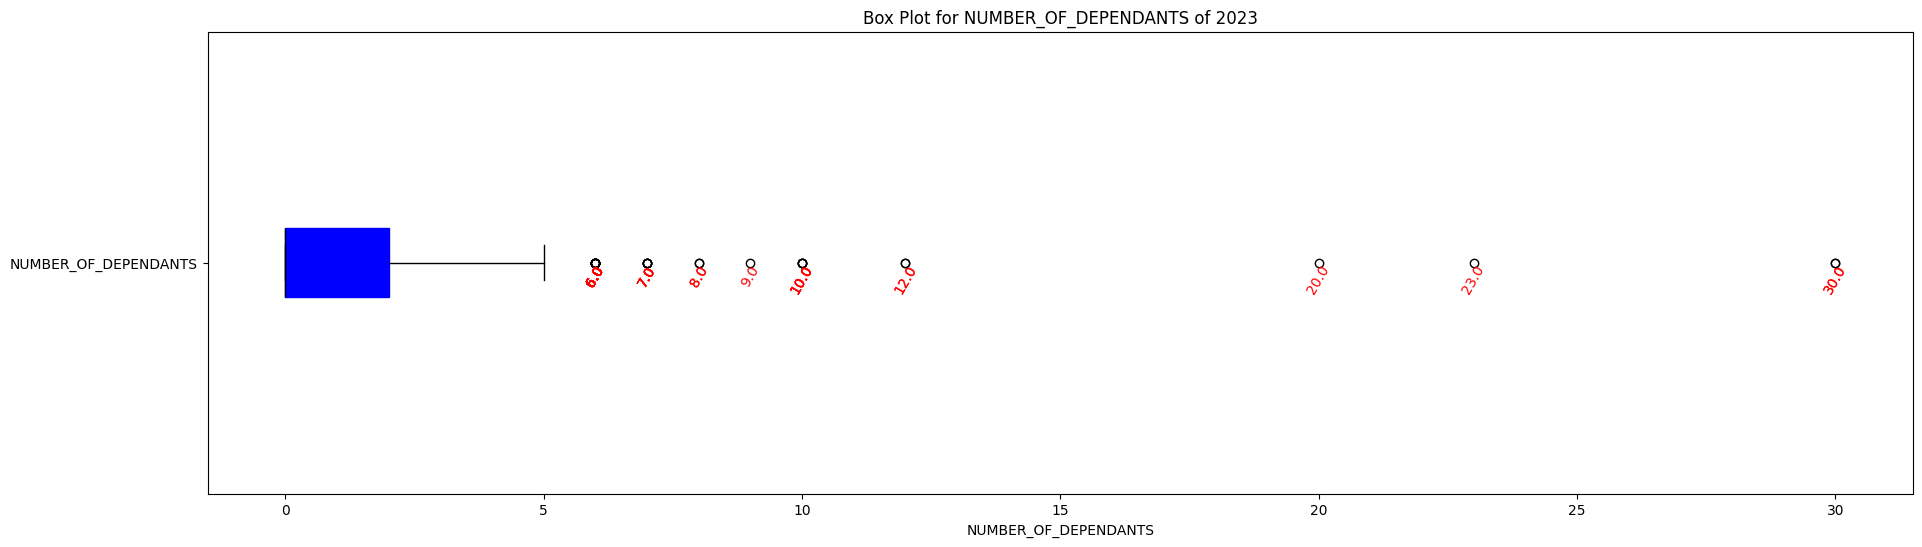

In [42]:
pie_plot_1(merged_2022, 'NUMBER_OF_DEPENDANTS', colors)
pie_plot_1(merged_2023, 'NUMBER_OF_DEPENDANTS', colors)

box_plot(merged_2022, 'NUMBER_OF_DEPENDANTS', colors)
box_plot(merged_2023, 'NUMBER_OF_DEPENDANTS', colors)

### CUSTOMER_INCOME

KeyboardInterrupt: 

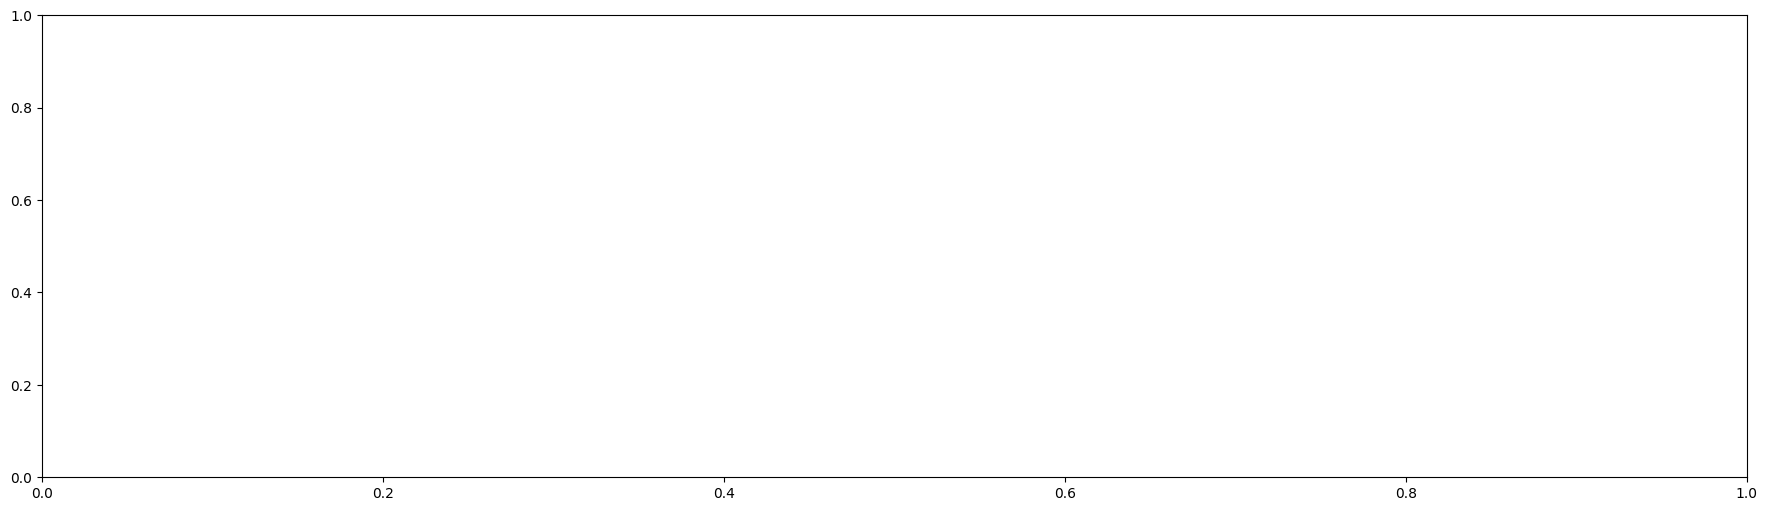

In [43]:
hist_plot_1(merged_2022, 'CUSTOMER_INCOME', colors)
hist_plot_1(merged_2023, 'CUSTOMER_INCOME', colors)

box_plot(merged_2022, 'CUSTOMER_INCOME', colors)
box_plot(merged_2023, 'CUSTOMER_INCOME', colors)

### WORKING_IN_YEAR

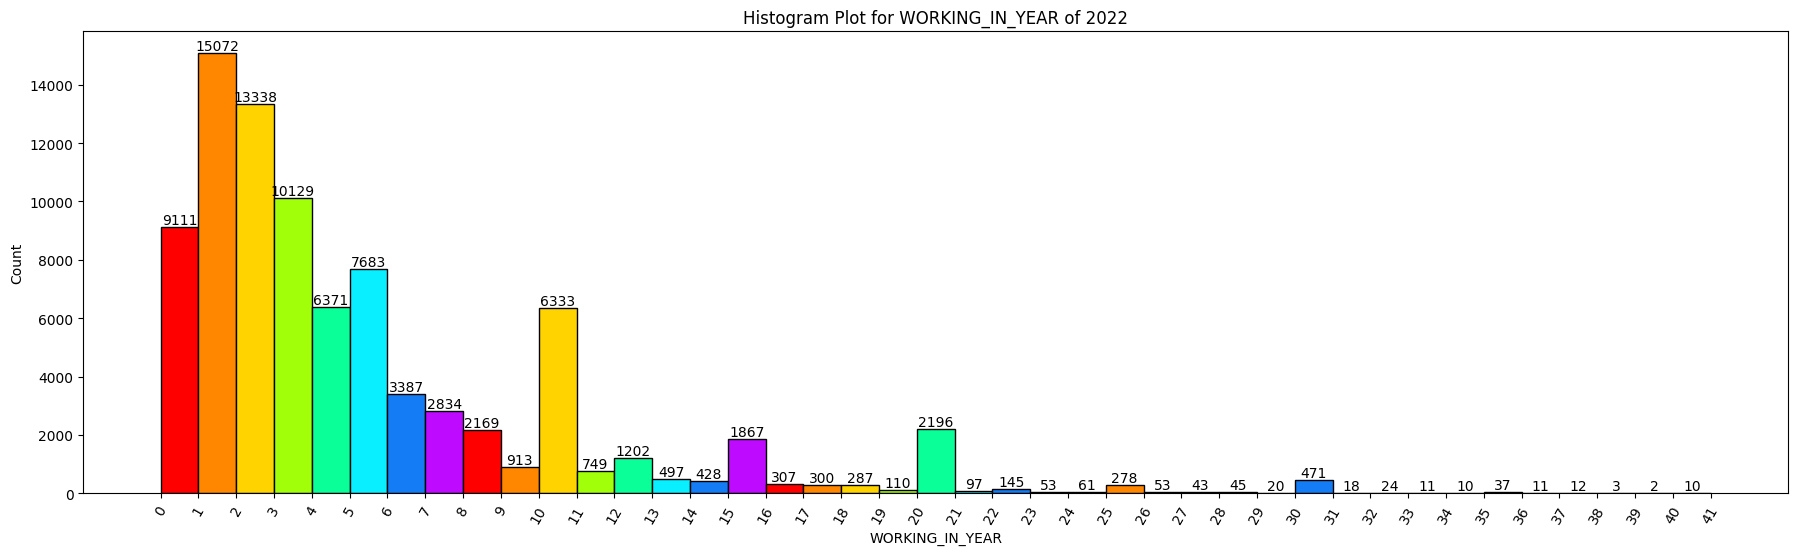

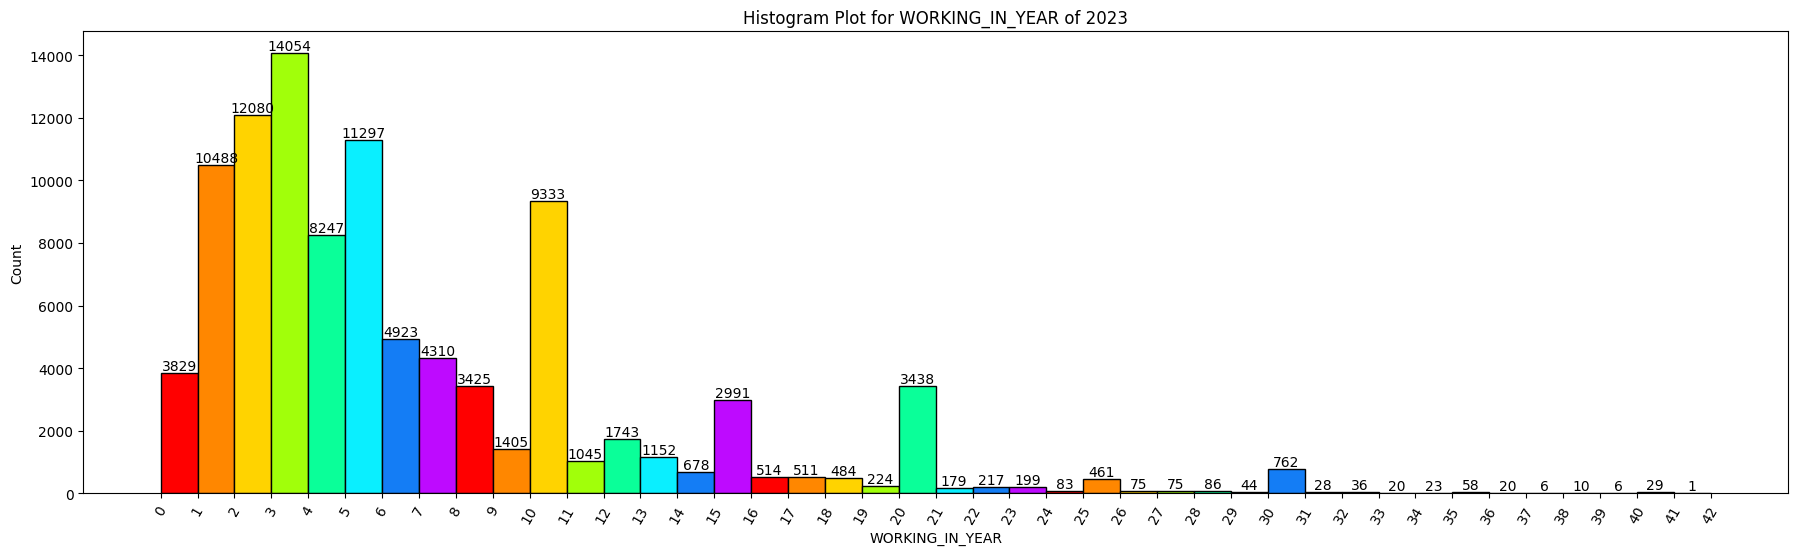

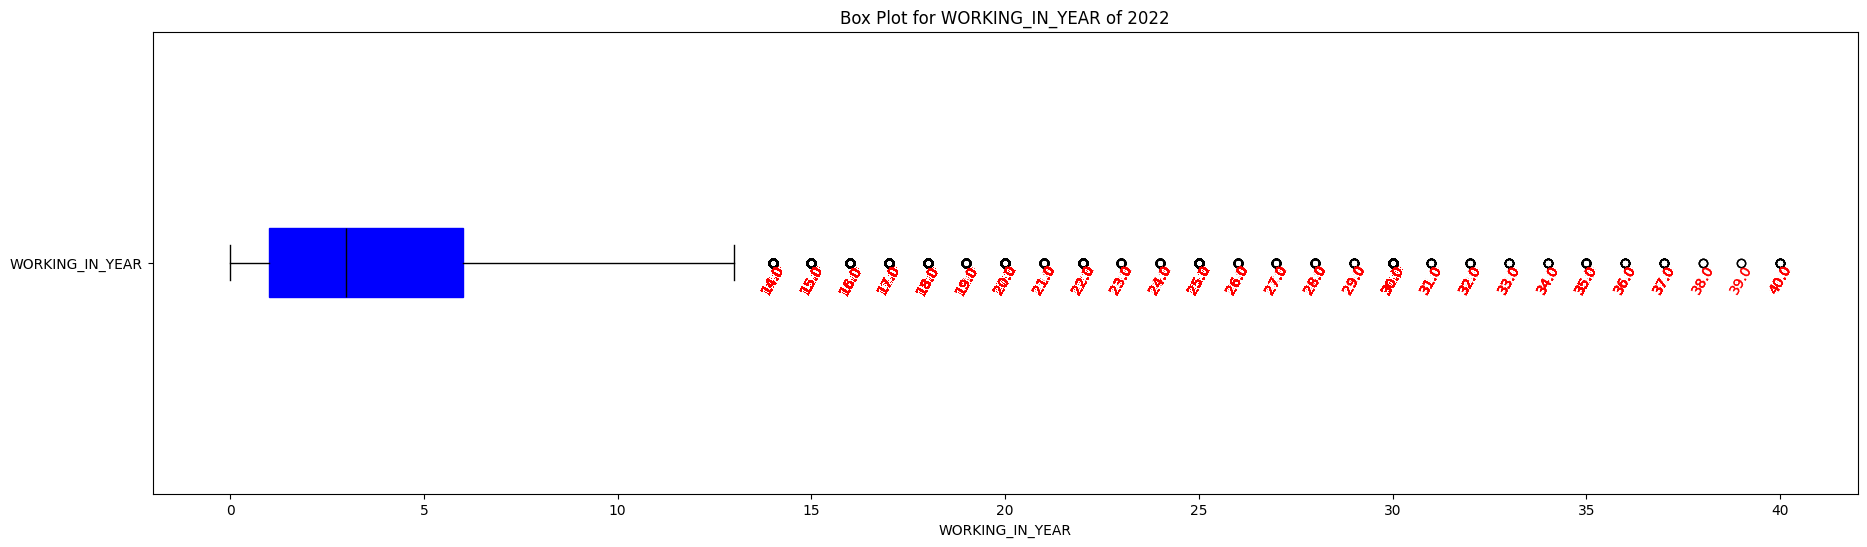

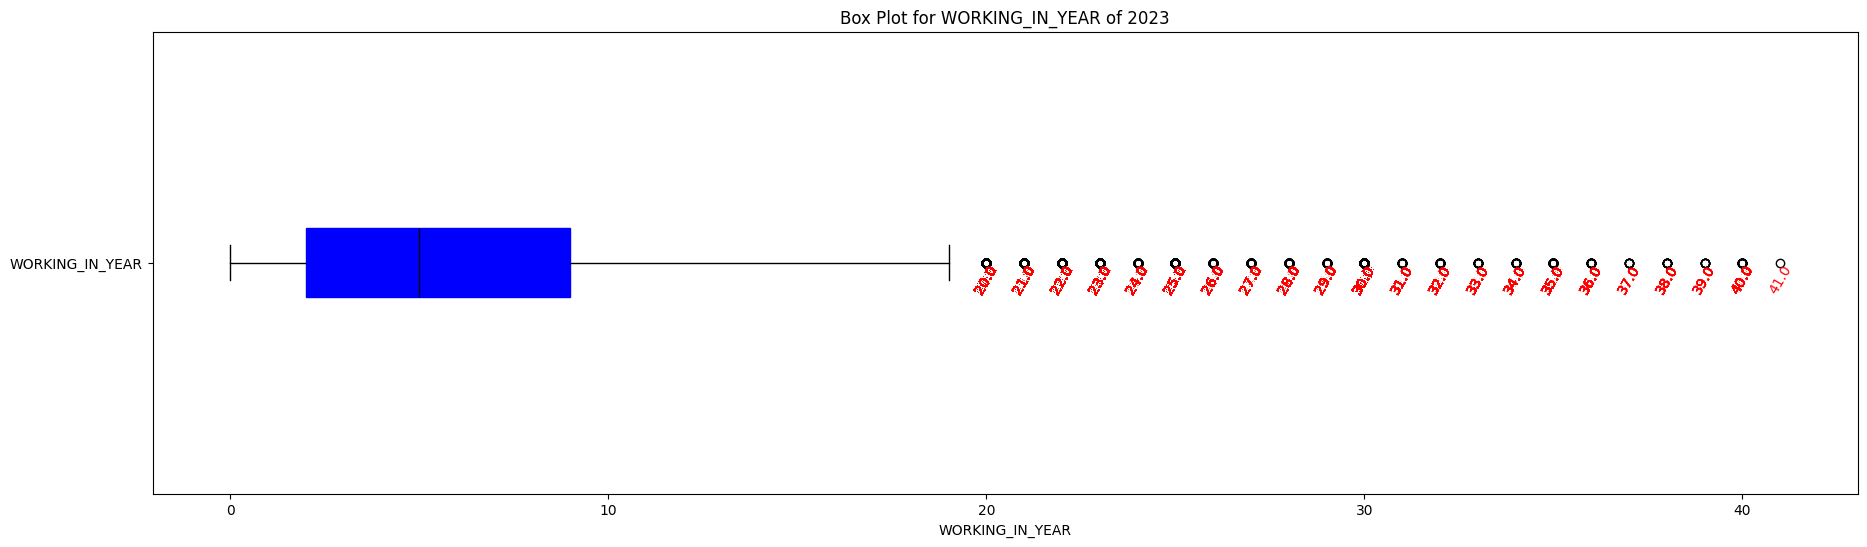

In [ ]:
hist_plot(merged_2022, 'WORKING_IN_YEAR', colors)
hist_plot(merged_2023, 'WORKING_IN_YEAR', colors)

box_plot(merged_2022, 'WORKING_IN_YEAR', colors)
box_plot(merged_2023, 'WORKING_IN_YEAR', colors)

## QUESTION 2:
Examine the loans borrowed in detailed, including:
- Loan Types
- Amount Borrowed
- Interest Rate
- Loan Purposes
- Loan Terms
- Other Factors (if possible)
 

In [ ]:
Q2 = merged_df[['PRODUCT_CATEGORY', 'LOAN_AMOUNT', 'MONTH_INTEREST', 'LOAN_PURPOSE', 'LOAN_TERM']]
Q2.describe()

,PRODUCT_CATEGORY,LOAN_AMOUNT,MONTH_INTEREST,LOAN_PURPOSE,LOAN_TERM
count,227984.000000,228218.000000,227865.000000,228397.000000,227761.000000
mean,2.384439,2.540289,2.012554,3.590446,24.857623
std,2.777668,1.598981,0.625939,1.575856,8.827978
min,0.000000,0.010000,0.100000,0.000000,3.000000
25%,1.000000,1.460000,1.600000,3.000000,18.000000
50%,1.000000,2.540000,2.200000,3.000000,24.000000
75%,3.000000,3.970000,2.500000,6.000000,36.000000
max,18.000000,6.400000,3.200000,6.000000,36.000000


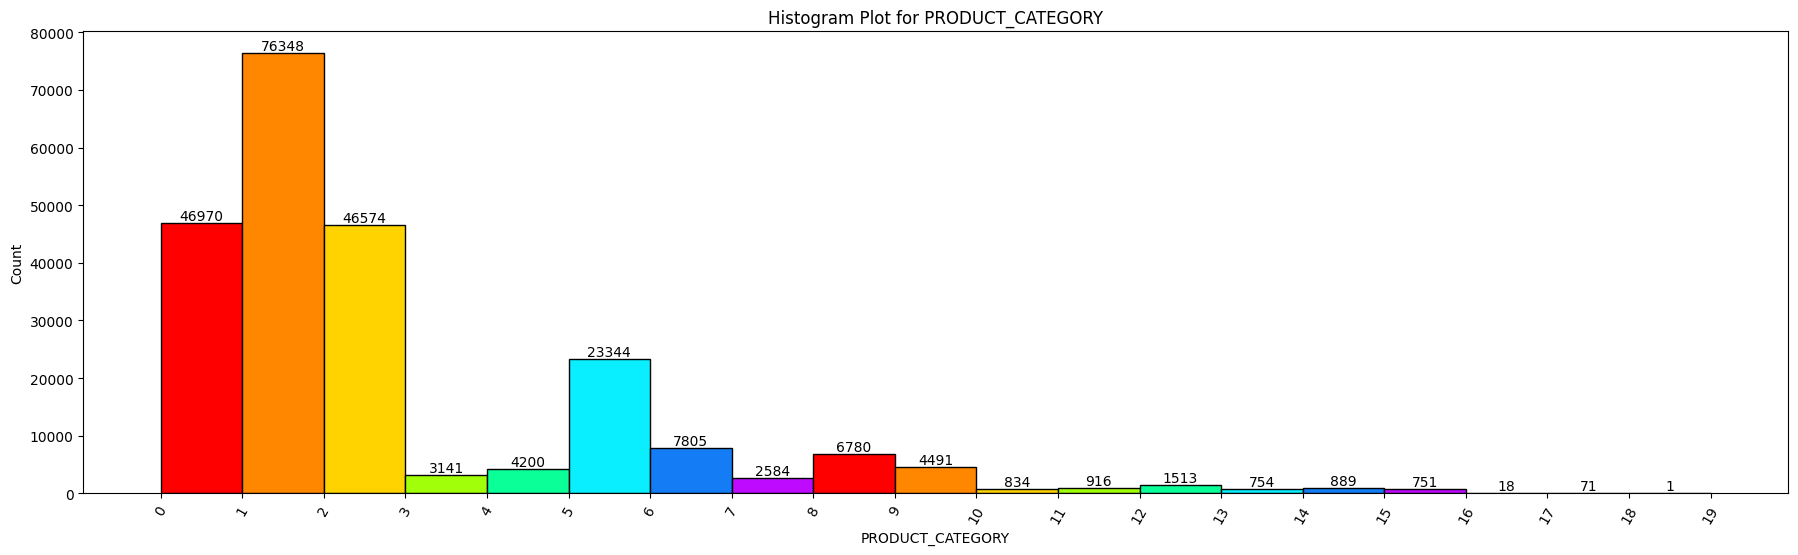

In [ ]:
hist_plot(Q2, 'PRODUCT_CATEGORY', colors)

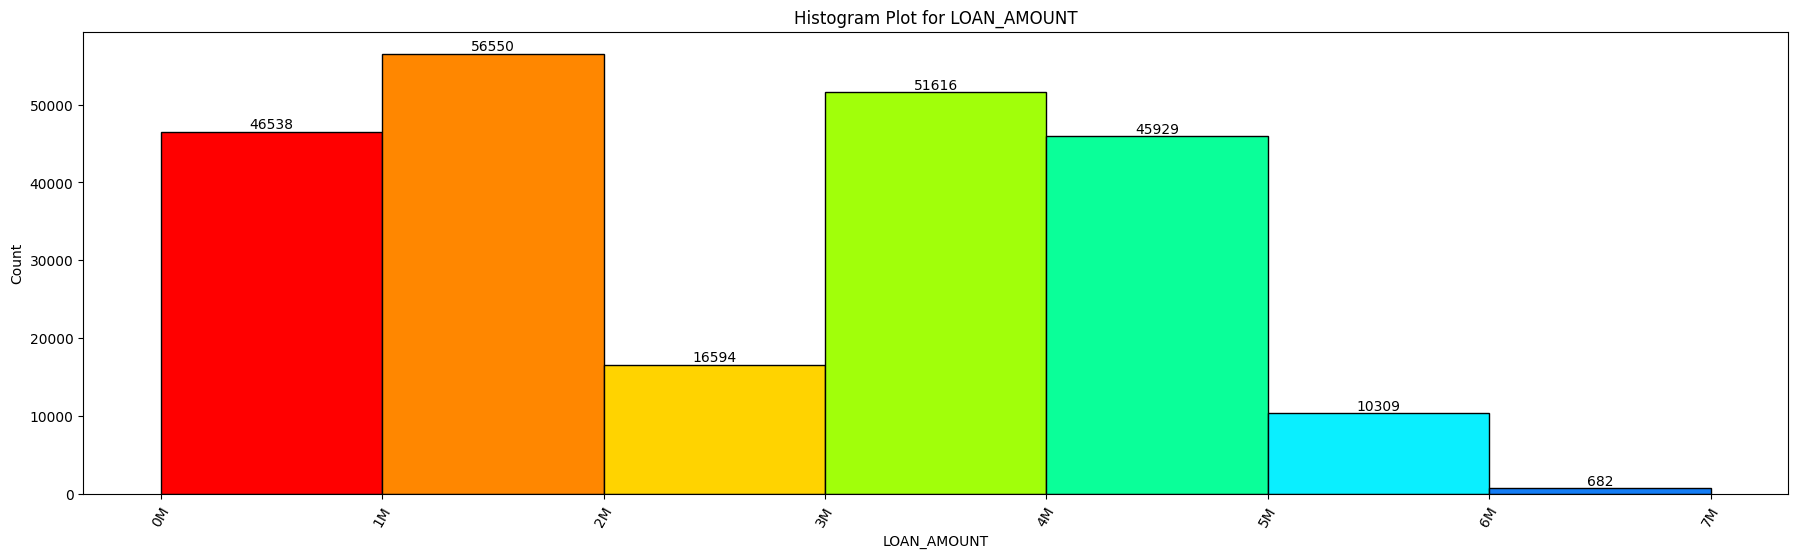

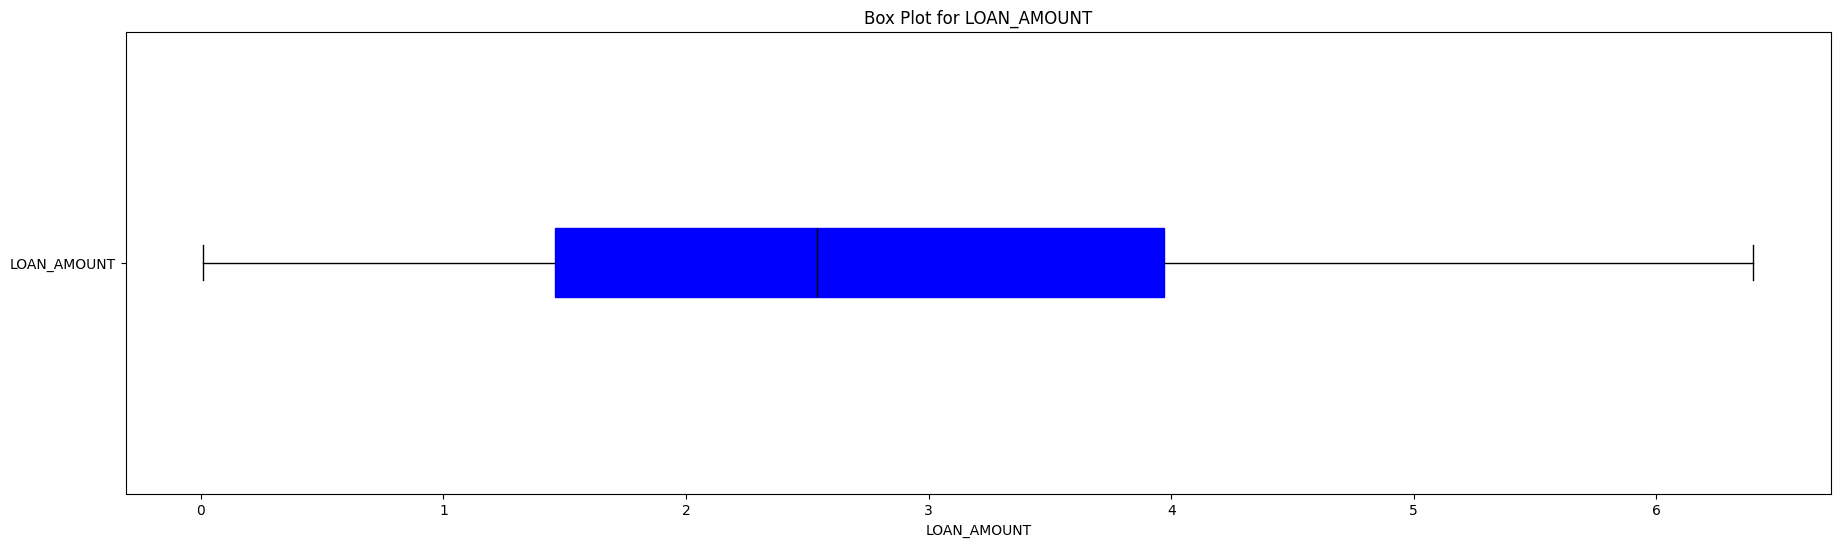

In [ ]:
hist_plot_1(Q2, 'LOAN_AMOUNT', colors)
box_plot(Q2, 'LOAN_AMOUNT', colors)

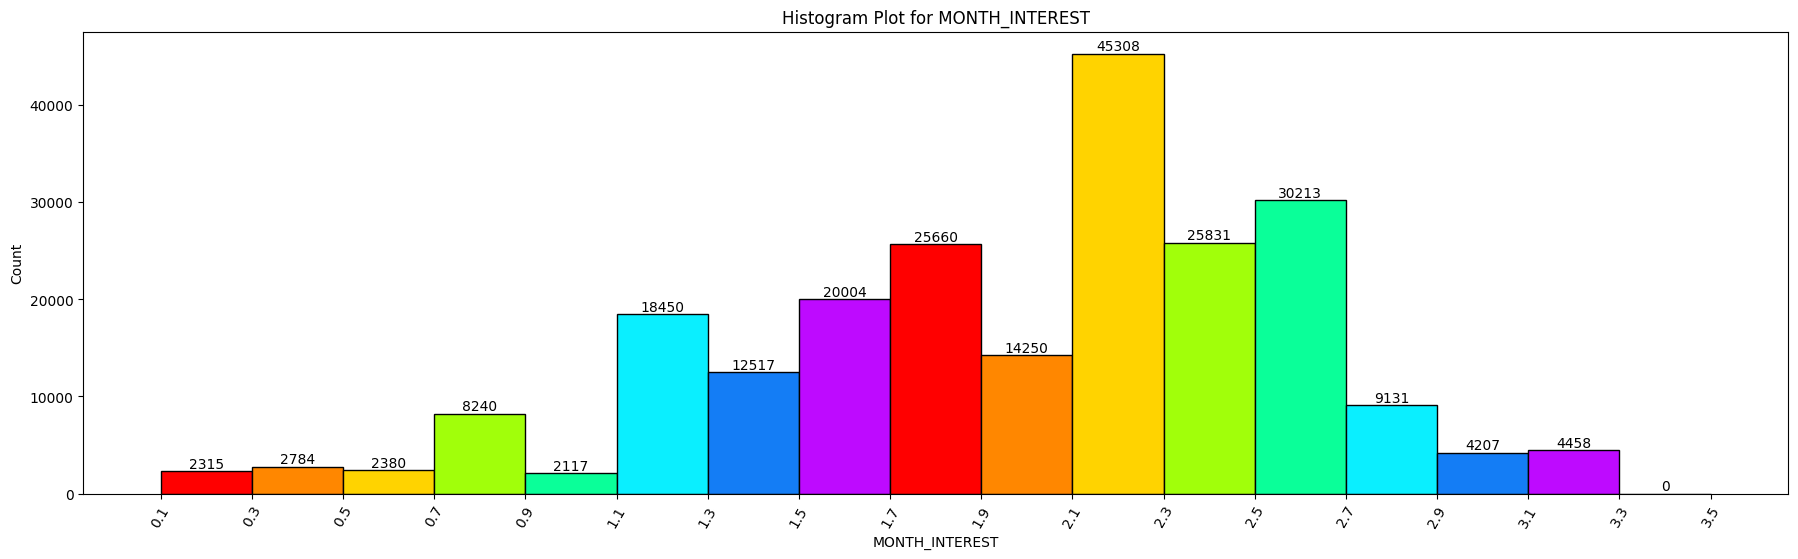

In [ ]:
hist_plot(Q2, 'MONTH_INTEREST', colors, 0.2)

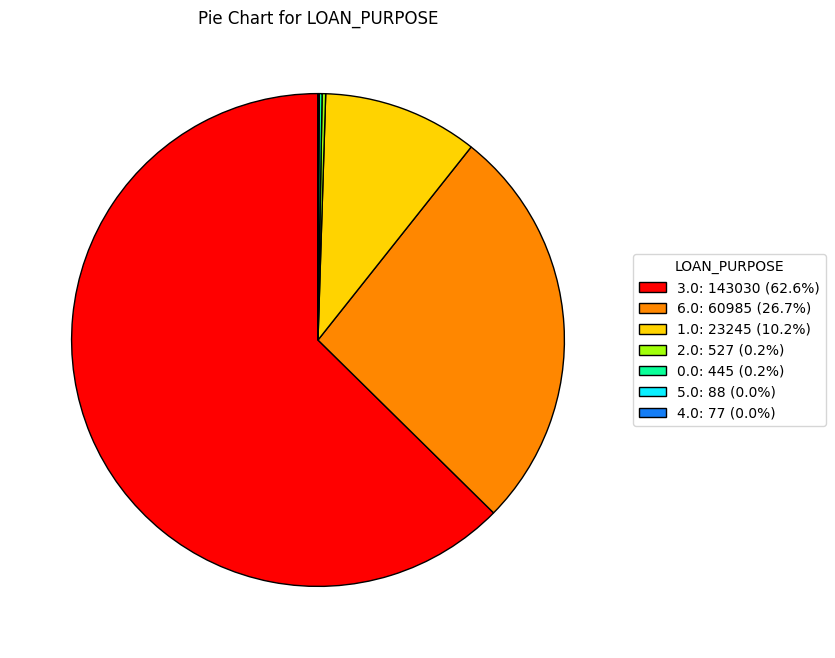

In [ ]:
pie_plot(Q2, 'LOAN_PURPOSE', colors)

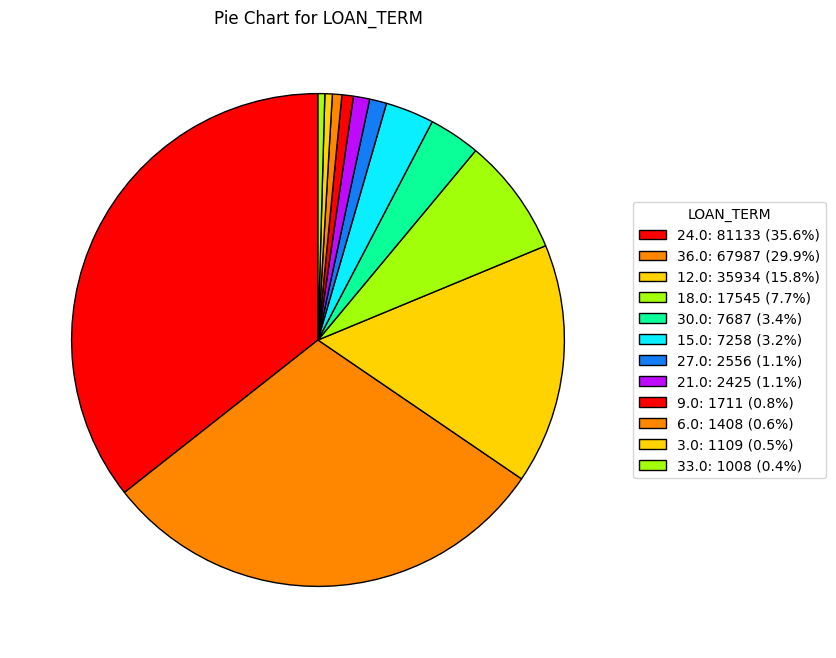

In [ ]:
pie_plot(Q2, 'LOAN_TERM', colors)

## QUESTION 3:
Finding the relationship between customer profiles and loan types is significant for risk management and improving services.
- Can you explore the relationship between customer demographics and the types of loans they borrowed? Are there any significant correlations and patterns?
- Are there any differences in trends or customer behaviour between 2022 and 2023?


ACCOMMODATION_TYPE


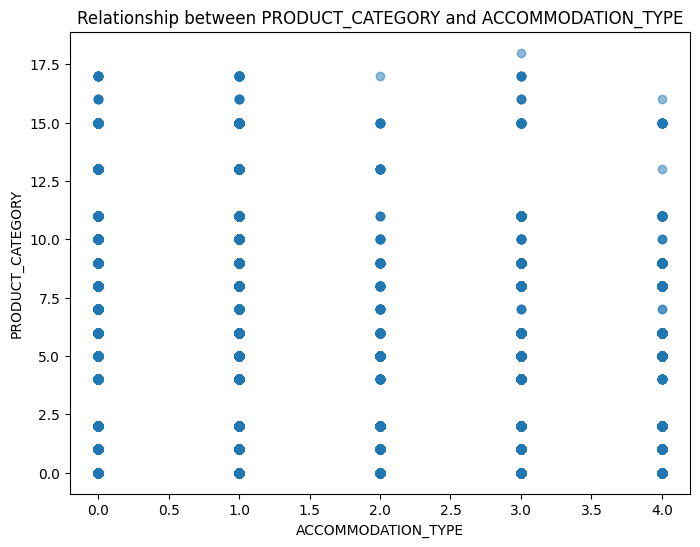

BUSINESS_LINE


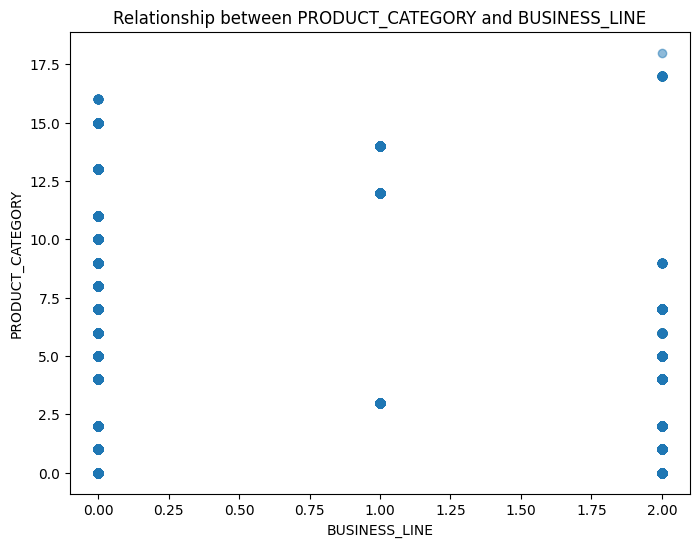

COMPANY_ADDRESS_PROVINCE


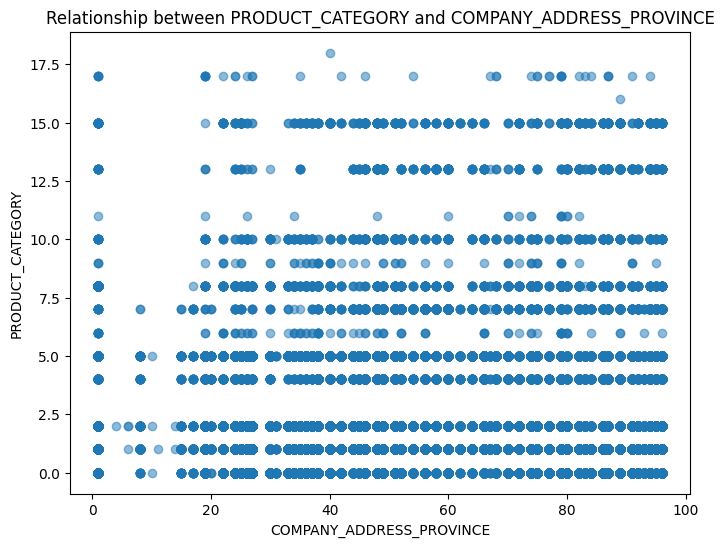

CONTRACT_NO


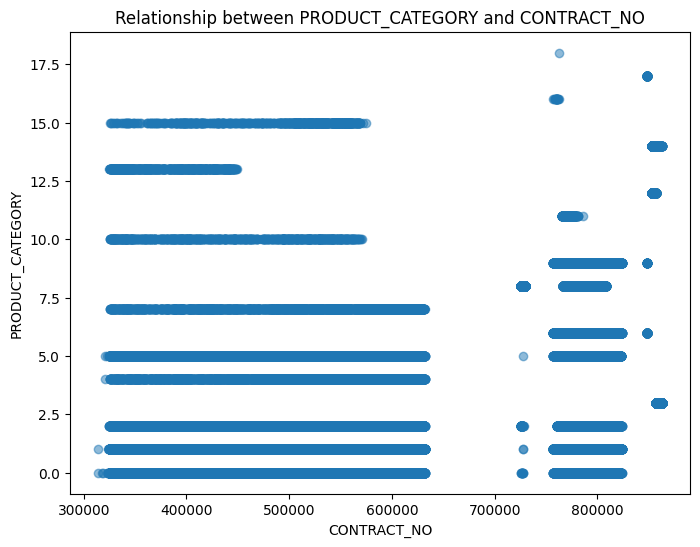

CREDITIBILITY


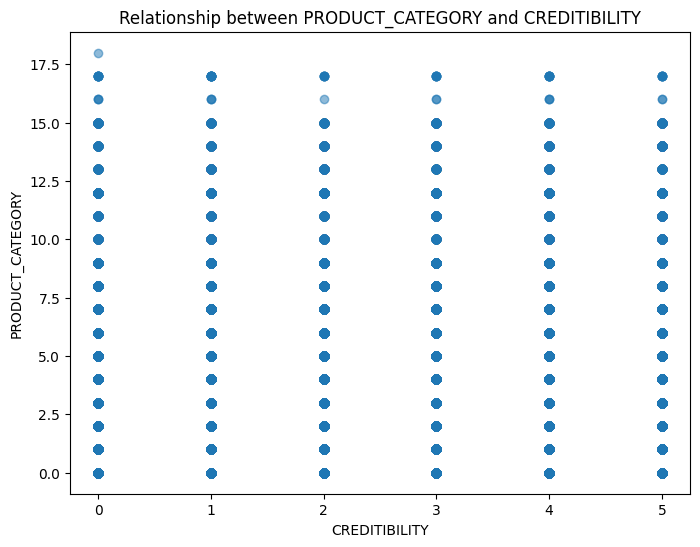

CUSTOMER_INCOME


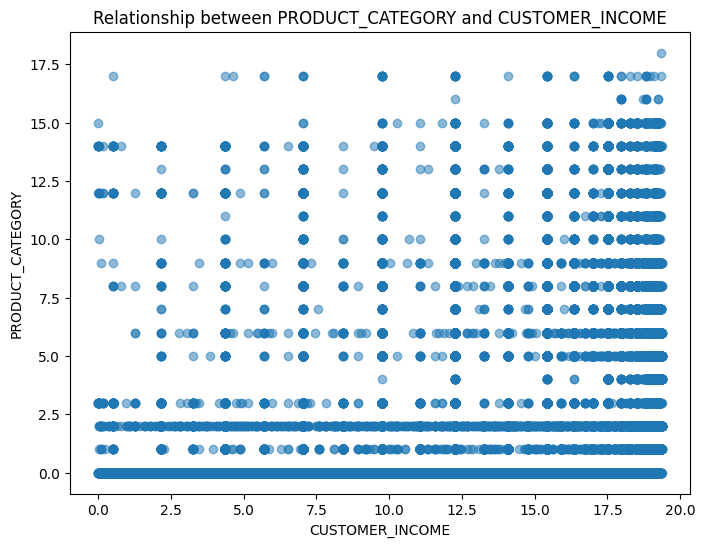

DATE_OF_BIRTH


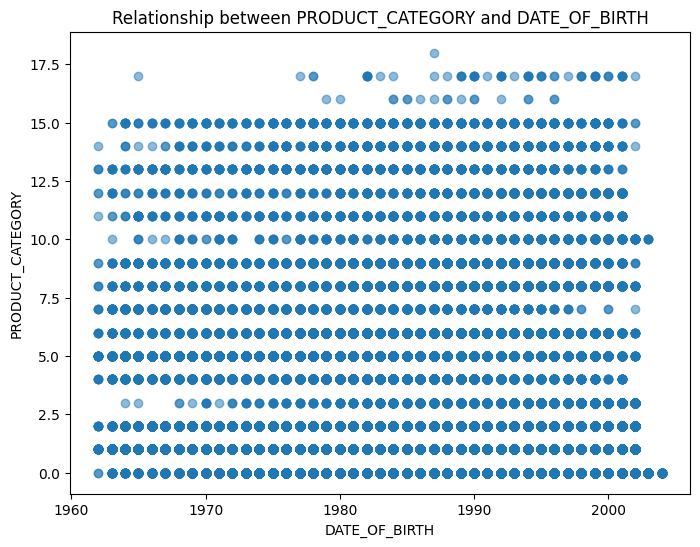

DISBURSEMENT_CHANNEL


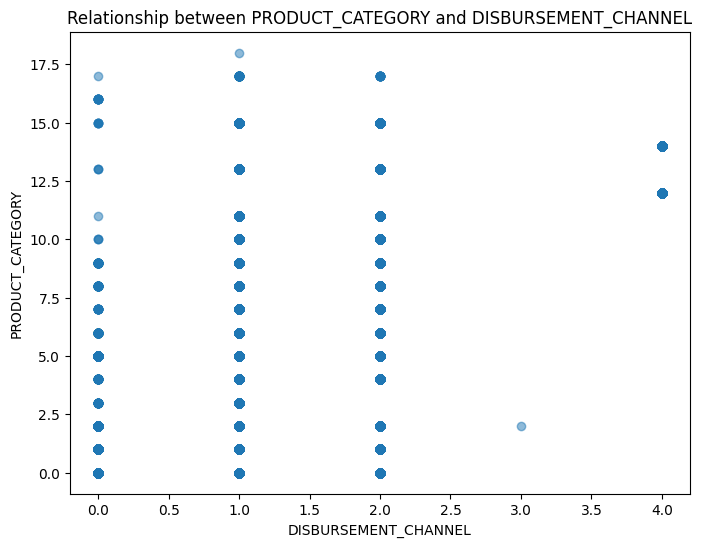

DISBURSEMENT_DATE


TypeError: 'value' must be an instance of str or bytes, not a float

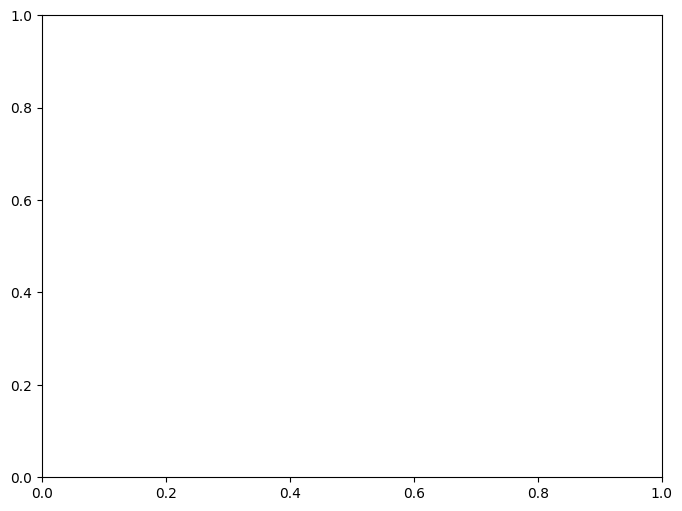

In [ ]:
conchim
def plot_relationships(df, target_attr):
    other_attrs = df.columns.difference([target_attr])
    
    for attr in other_attrs:
        print(attr)
        plt.figure(figsize=(8, 6))
        plt.scatter(df[attr], df[target_attr], alpha=0.5)
        plt.xlabel(attr)
        plt.ylabel(target_attr)
        plt.title(f'Relationship between {target_attr} and {attr}')
        plt.show()

# Example usage
plot_relationships(merged_df, 'PRODUCT_CATEGORY')

## QUESTION 4:
From the above analysis, can you develop actionable insights and recommendations to increase loan origination and sales based on the findings from the analysis? Focus on identifying new opportunities and strategies to target potential customers effectively